# My First Project on Web Scrapping:

---

**Topic: Web Scraping and Stock Analysis of Tesla and GameStop Using BeautifulSoup and yFinance**

---
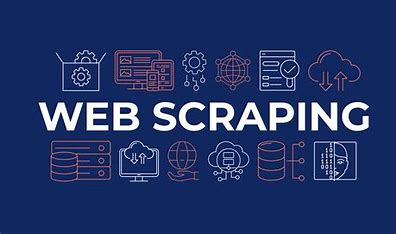

----
I am thrilled to share that I have embarked on my very first project in web scraping using Python. This project is particularly special as it marks my initial foray into web scraping.


Web scraping, for those who may not be familiar, is a technique used to extract data from websites. This method allows for efficient collection of large datasets from the web, which can be crucial for analysis, research, and tracking trends. The possibilities with web scraping are vast, and I’m eager to explore them.


For my project, I’ve chosen to analyze the stock data and revenue patterns of two well-known companies, **Tesla** and **GameStop**. By utilizing tools like *BeautifulSoup* and *yFinance*, I aim to extract and interpret this data, gaining valuable insights into their financial performance.

This journey is filled with excitement as I dive into understanding how to use these tools to uncover meaningful patterns in stock data. I’m eager to see where this project will lead and what new knowledge I’ll gain from it.

#Import Libraries:
-----
The **yfinance** library is used to fetch stock data, while **pandas** handles data manipulation and analysis. The **requests** library, in conjunction with **BeautifulSoup**, is employed for web scraping to extract information from HTML content. For visualization, the **plotly** library is used, specifically plotly.graph_objects and make_subplots, to create interactive and detailed visualizations of the financial data.

The overall approach is to gather, process, and visually represent stock market data, likely for the purpose of analyzing trends and patterns.

In [47]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [48]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

#Define Graphing Function
-----
This code defines a function **make_graph** that creates a two-part interactive plot using **plotly**. It visualizes historical stock prices and revenue data for a specified stock. The function filters the data to include dates up to mid-2021, then plots the stock's closing prices on one graph and its revenue on another, stacking them vertically.

In [49]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

#Extract Stock Data for Tesla
----
I'm using **yfinance** to get Tesla's complete historical stock data, resetting the index to include the date as a column, and then looking at the initial entries to understand the data structure.








In [50]:
tesla = yf.Ticker("TSLA")
tesla

yfinance.Ticker object <TSLA>

In [51]:
tesla_data = tesla.history(period="max")
tesla_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...
2024-09-23 00:00:00-04:00,242.610001,250.000000,241.919998,250.000000,86927200,0.0,0.0
2024-09-24 00:00:00-04:00,254.080002,257.190002,249.050003,254.270004,88491000,0.0,0.0
2024-09-25 00:00:00-04:00,252.539993,257.049988,252.279999,257.019989,65034300,0.0,0.0


In [52]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


#Use Webscraping to Extract Tesla Revenue Data
-----

Here, I'm scraping Tesla's quarterly revenue data from a web page using **requests** and **BeautifulSoup**. The code finds the table containing the relevant data, extracts the date and revenue values, cleans up the revenue data by removing dollar signs and commas, and stores the information in a DataFrame, named *tesla_revenue*. Finally, it cleans this dataFrame by removing any empty or NaN values and displays the last few rows.

In [53]:
url =  "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text

In [54]:
soup = BeautifulSoup(html_data, 'html.parser')

In [55]:
tables = soup.find_all('table')
relevant_table = None
for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        relevant_table = table
        break
data = []
if relevant_table:
    rows = relevant_table.find_all('tr')
    for row in rows:
        columns = row.find_all('td')
        if len(columns) >= 2:
            date = columns[0].text.strip()
            revenue = columns[1].text.strip()

            revenue = revenue.replace('$', '').replace(',', '')

            data.append({"Date": date, "Revenue": revenue})

tesla_revenue = pd.DataFrame(data)

print(tesla_revenue)

          Date Revenue
0   2022-09-30   21454
1   2022-06-30   16934
2   2022-03-31   18756
3   2021-12-31   17719
4   2021-09-30   13757
5   2021-06-30   11958
6   2021-03-31   10389
7   2020-12-31   10744
8   2020-09-30    8771
9   2020-06-30    6036
10  2020-03-31    5985
11  2019-12-31    7384
12  2019-09-30    6303
13  2019-06-30    6350
14  2019-03-31    4541
15  2018-12-31    7226
16  2018-09-30    6824
17  2018-06-30    4002
18  2018-03-31    3409
19  2017-12-31    3288
20  2017-09-30    2985
21  2017-06-30    2790
22  2017-03-31    2696
23  2016-12-31    2285
24  2016-09-30    2298
25  2016-06-30    1270
26  2016-03-31    1147
27  2015-12-31    1214
28  2015-09-30     937
29  2015-06-30     955
30  2015-03-31     940
31  2014-12-31     957
32  2014-09-30     852
33  2014-06-30     769
34  2014-03-31     621
35  2013-12-31     615
36  2013-09-30     431
37  2013-06-30     405
38  2013-03-31     562
39  2012-12-31     306
40  2012-09-30      50
41  2012-06-30      27
42  2012-03

In [56]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"", regex=True)

In [57]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [58]:
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


#Extract Stock Data for GameStop
-----
I'm performing the same data extraction and cleaning process for GameStop's quarterly revenue data as I did for Tesla.

In [59]:
gme = yf.Ticker("GME")
gme

yfinance.Ticker object <GME>

In [60]:
gme_data = gme.history(period="max")
gme_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0
...,...,...,...,...,...,...,...
2024-09-23 00:00:00-04:00,21.540001,22.559999,21.230000,22.309999,13969500,0.0,0.0
2024-09-24 00:00:00-04:00,22.610001,22.719999,21.540001,22.629999,12121400,0.0,0.0
2024-09-25 00:00:00-04:00,22.160000,22.830000,22.070000,22.180000,6139700,0.0,0.0


In [61]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


#Use Webscraping to Extract GME Revenue Data

In [62]:
url_1 =   "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data_2 = requests.get(url_1).text

In [63]:
soup_1 = BeautifulSoup(html_data_2, 'html.parser')

In [64]:
tables_1 = soup_1.find_all('table')
relevant_table_1 = None

# Search for the table containing "Netflix Revenue"
for table in tables_1:
    if "GameStop Quarterly Revenue" in table.get_text():  # Use get_text() instead of text
        relevant_table_1 = table
        break

data_1 = []

if relevant_table_1:
    rows_1 = relevant_table_1.find_all('tr')
    for row_1 in rows_1:
        columns_1 = row_1.find_all('td')
        if len(columns_1) >= 2:
            date_1 = columns_1[0].get_text().strip()  # Use get_text() instead of text
            revenue_1 = columns_1[1].get_text().strip()  # Use get_text() instead of text

            # Clean the revenue data by removing '$' and ',' and converting to float
            revenue_1 = revenue_1.replace('$', '').replace(',', '')
            try:
                revenue_1 = float(revenue_1)
            except ValueError:
                revenue_1 = None  # Handle cases where conversion fails

            data_1.append({"Date": date_1, "Revenue": revenue_1})

# Create a DataFrame from the data
gme_revenue = pd.DataFrame(data_1)


# Display the DataFrame
print(gme_revenue)

          Date  Revenue
0   2020-04-30   1021.0
1   2020-01-31   2194.0
2   2019-10-31   1439.0
3   2019-07-31   1286.0
4   2019-04-30   1548.0
..         ...      ...
57  2006-01-31   1667.0
58  2005-10-31    534.0
59  2005-07-31    416.0
60  2005-04-30    475.0
61  2005-01-31    709.0

[62 rows x 2 columns]


In [65]:
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667.0
58,2005-10-31,534.0
59,2005-07-31,416.0
60,2005-04-30,475.0
61,2005-01-31,709.0


#Plot Tesla Stock Graph

In [66]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

#Plot GameStop Stock Graph

In [67]:
make_graph(gme_data, gme_revenue, 'GameStop')

#Combined plot for Historical Share Prices and Quarterly Revenues of Tesla and GameStop

In [68]:
def make_combined_graph(stock_data_dict, revenue_data_dict):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing=0.3)

    for stock, stock_data in stock_data_dict.items():
        stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
        fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name=f"{stock} Share Price"), row=1, col=1)

    for stock, revenue_data in revenue_data_dict.items():
        revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
        fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name=f"{stock} Revenue"), row=2, col=1)

    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=True, height=900, title="Stock Prices and Revenues", xaxis_rangeslider_visible=True)

    fig.show()

# Prepare data dictionaries
stock_data_dict = {'Tesla': tesla_data, 'GameStop': gme_data}
revenue_data_dict = {'Tesla': tesla_revenue, 'GameStop': gme_revenue}

# Create the combined graph
make_combined_graph(stock_data_dict, revenue_data_dict)


# Findings:


*   Tesla's historic share price began to outpace GameStop's in February 2014, according to the data. It reached its peak in January 2021.


*   Tesla's revenue growth surpassed GameStop's from July 2016, reaching over $10 billion by December 2020.

